<a href="https://colab.research.google.com/github/cindykhris/SummerInternship2020/blob/master/SummerInternship2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pine Biotech Summer Reasearch

**Cindy Pino**


Abstract: In this study, we will analyze the gene expression differnt coronaviruses (CoVs) infections to determine how each virus differs when causing a disease. Here, we focuses the analysis on samples from SARS-CoV-1, MERS, and SARS-CoV-2. 
The raw sequence data (fastq files) for the SARS-CoV-1 and MERS infections were downloaded from GEO [GSE56192](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE56192), including their corresponding Mock-treated controls). The raw sequence data (fastq files) for the SARS-CoV-2 infections were downloaded from GEO ([GSE147507](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE147507)), including their corresponding Mock-treated controls). 

In this Jupyter notebook, I will use both R and Python to analyze three viruses: MERS, SARS-CoV-1, amd SARS-CoV-2

##Using R and Python in the same Notebook
First, let's active R magic. Don't forget to use %%R before running a R code 


---

In [2]:
#active R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


##Import all the folders we will need for this files (R and Python)

###Python

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###R

In [3]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/BiocManager_1.30.10.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 40205 bytes (39 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

In [4]:
%%R
library(DESeq2)


R[write to console]: Loading required package: S4Vectors

R[write to console]: Loading required package: stats4

R[write to console]: Loading required package: BiocGenerics

R[write to console]: Loading required package: parallel

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, 

In [248]:
%%R
library(tidyverse)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()        masks IRanges::collapse()
✖ dplyr::combine()         masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()           masks matrixStats::count()
✖ dplyr::desc()            masks IRanges::desc()
✖ tidyr::expand()          masks S4Vectors::expand()
✖ dplyr::filter()          masks stats::filter()
✖ dplyr::first()           masks S4Vectors::first()
✖ dplyr::lag()             masks stats::lag()
✖ BiocGenerics::Position() masks ggplot2::Position(), base::Position()
✖ purrr::reduce()          masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()          masks S4Vectors::rename()
✖ purrr::si

In [217]:
%%R
install.packages('dplyr', lib = "/usr/lib/R/library")

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 935654 bytes (913 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

In [49]:
%%R
install.packages('EnhancedVolcano',lib = "/usr/lib/R/library")
library(EnhancedVolcano)

R[write to console]: Error in library(EnhancedVolcano) : 
  there is no package called ‘EnhancedVolcano’
Calls: <Anonymous> ... <Anonymous> -> <Anonymous> -> withVisible -> library

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: package ‘ggplot’ is not available (for R version 3.6.3) 

R[write to console]: 2: package ‘EnhancedVolcano’ is not available (for R version 3.6.3) 

R[write to console]: 3: package ‘EnhancedVolcano’ is not available (for R version 3.6.3) 




Error in library(EnhancedVolcano) : 
  there is no package called ‘EnhancedVolcano’
Calls: <Anonymous> ... <Anonymous> -> <Anonymous> -> withVisible -> library


In [47]:
%%R
install.packages('ggplot',lib = "/usr/lib/R/library")



## SARS-CoV
Severe Acute Respiratory Syndrom Coronavirus (SARS-CoV) was first identified in 20013 (WHO). 

In [220]:
%%R
df = read.table('drive/My Drive/SummerResearch/DESeq_SARS_expression_genes_FPKM.txt',skip = 1, header = TRUE)


In [221]:
%%R
# Cleaning the file for processing
ColNames1 <- df$id #take the column name
df = df[,-1] #take the data part - numeric values
df=as.matrix(df)

In [222]:
%%R
names(df) <- NULL

In [223]:
%%R
#Remove NAs from dataset
datanew <- na.exclude(df)

In [224]:
%%R
#Remove zeroes 
data <- filter(df, undersirable != 0)
head(data,10)

R[write to console]: Error in filter(df, undersirable != 0) : object 'undersirable' not found
Calls: <Anonymous> ... <Anonymous> -> <Anonymous> -> withVisible -> filter

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In file.create(f.tg) :
R[write to console]: 
 
R[write to console]:  cannot create file '/usr/lib/R/doc/html/packages.html', reason 'No such file or directory'

R[write to console]: 2: 
R[write to console]: In make.packages.html(.Library) :
R[write to console]:  cannot update HTML package index

R[write to console]: 3: package ‘EnhancedVolcano’ is not available (for R version 3.6.3) 

R[write to console]: 4: package ‘ggplot’ is not available (for R version 3.6.3) 




Error in filter(df, undersirable != 0) : object 'undersirable' not found
Calls: <Anonymous> ... <Anonymous> -> <Anonymous> -> withVisible -> filter


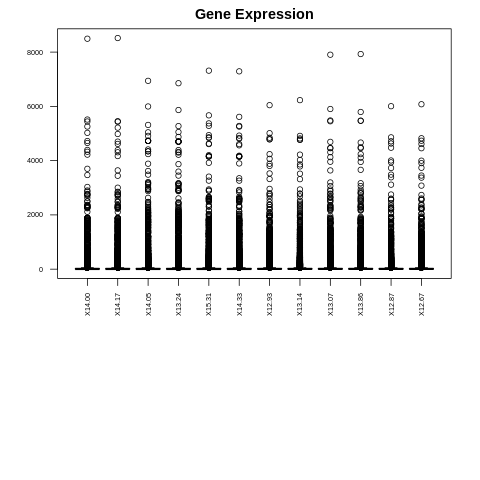

In [225]:
%%R
#Basic Settings:

colors <- c(rep('red',6),rep('blue',3),rep('green',2),rep('gray',2))
par(mar=c(14,4,2,2))
boxplot(df, main="Gene Expression",las = 2, cex.axis=0.6)


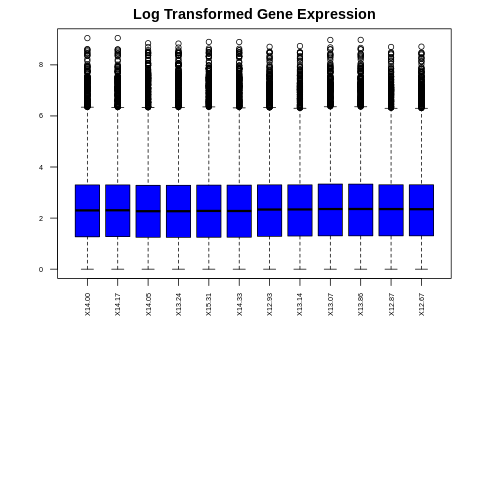

In [226]:

%%R
#Log transformation
logdata <- log(df+1)
par(mar=c(14,4,2,2))
boxplot(logdata, main="Log Transformed Gene Expression", col = 'blue', las = 2, cex.axis=0.6)


In [227]:
%%R
#Descriptive statistics
summary(df)

     X14.00            X14.17            X14.05            X13.24       
 Min.   :   0.00   Min.   :   0.00   Min.   :   0.00   Min.   :   0.00  
 1st Qu.:   2.55   1st Qu.:   2.58   1st Qu.:   2.48   1st Qu.:   2.47  
 Median :   8.98   Median :   9.03   Median :   8.67   Median :   8.67  
 Mean   :  46.00   Mean   :  45.98   Mean   :  49.29   Mean   :  49.19  
 3rd Qu.:  26.11   3rd Qu.:  26.11   3rd Qu.:  25.63   3rd Qu.:  25.67  
 Max.   :8494.14   Max.   :8518.84   Max.   :6941.47   Max.   :6853.46  
     X15.31             X14.33            X12.93             X13.14        
 Min.   :   0.000   Min.   :   0.00   Min.   :   0.000   Min.   :   0.000  
 1st Qu.:   2.487   1st Qu.:   2.49   1st Qu.:   2.610   1st Qu.:   2.660  
 Median :   8.785   Median :   8.75   Median :   9.325   Median :   9.365  
 Mean   :  47.898   Mean   :  47.84   Mean   :  43.011   Mean   :  43.016  
 3rd Qu.:  25.885   3rd Qu.:  25.90   3rd Qu.:  26.163   3rd Qu.:  26.170  
 Max.   :7316.370   Max.   :7291.

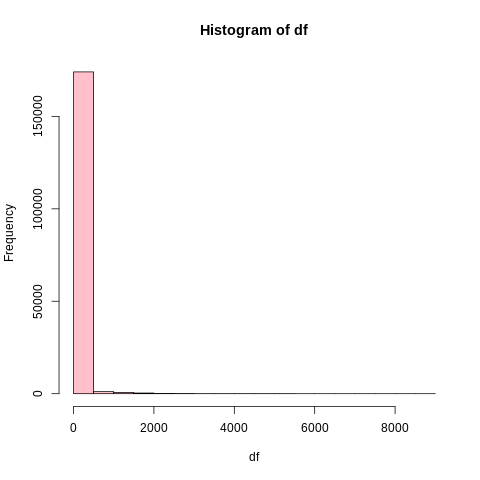

In [228]:
%%R
hist(df, col='pink')


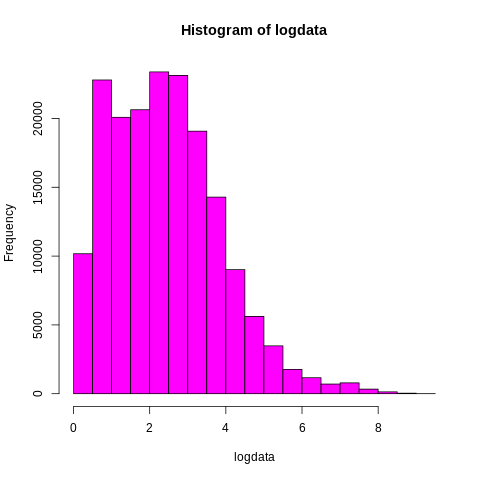

In [229]:
%%R
hist(logdata, col='magenta')

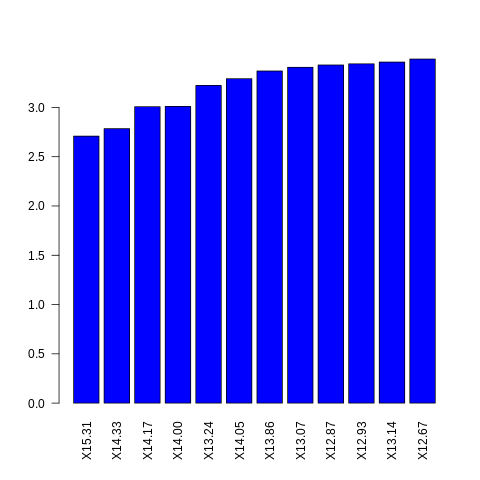

In [230]:
%%R
barplot(sort(logdata[100,]), col = "blue", main = ColNames1[2], font.axis=1, cex.axis=1, las=2)


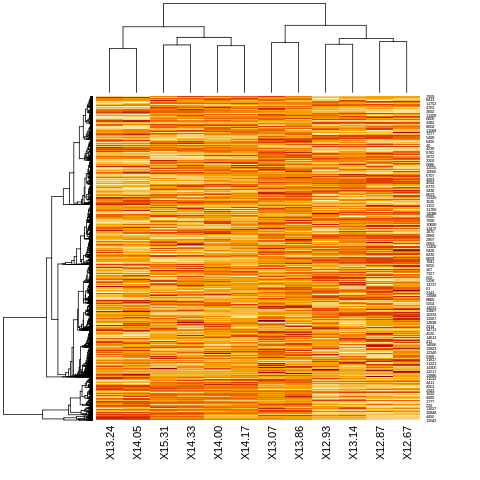

In [231]:
%%R
heatmap(logdata)

###DESeq2 
Differential Gene Expression

In [50]:
%%R
# Load the file - raw count
PDXdataset <- read.table("drive/My Drive/SummerResearch/DESeq_SARS_expression_genes.txt", header = TRUE, row.names=1, sep='\t')
head(PDXdataset,2)

                   group_1_sample_1_SRR1192353_PE
ENSG00000000003.13                           1005
ENSG00000000419.11                           1407
                   group_1_sample_2_SRR1192354_PE
ENSG00000000003.13                        1016.58
ENSG00000000419.11                        1360.00
                   group_1_sample_3_SRR1192370_PE
ENSG00000000003.13                           1011
ENSG00000000419.11                           1702
                   group_1_sample_4_SRR1192371_PE
ENSG00000000003.13                            952
ENSG00000000419.11                           1645
                   group_1_sample_5_SRR1192398_PE
ENSG00000000003.13                            979
ENSG00000000419.11                           1193
                   group_1_sample_6_SRR1192399_PE
ENSG00000000003.13                            921
ENSG00000000419.11                           1233
                   group_2_sample_1_SRR1193100_PE
ENSG00000000003.13                         605.01


In [54]:
%%R
#Create a dataframe - columns and rows
data <- (PDXdataset)
colnames(PDXdataset) -> names
meta_classes <- c('group_1','group_1','group_1','group_1','group_1','group_1','group_2','group_2','group_2','group_2','group_2','group_2')
meta_data <- data.frame(names, meta_classes)


In [ ]:
%%R
length(unique(data[,1]))==length(data[,1])
data <- unique(data)

Streaming output truncated to the last 5000 lines.
ENSG00000120314.17                        1416.39
ENSG00000120318.14                         860.00
ENSG00000120322.3                            7.34
ENSG00000120324.6                           35.83
ENSG00000120327.6                           72.50
ENSG00000120328.6                           10.00
ENSG00000120329.6                            0.00
ENSG00000120333.4                         1056.02
ENSG00000120334.14                         371.00
ENSG00000120337.8                           25.00
ENSG00000120341.17                         176.28
ENSG00000120370.11                         353.00
ENSG00000120437.8                         1278.57
ENSG00000120438.10                        9470.43
ENSG00000120451.9                         4945.93
ENSG00000120457.10                           3.00
ENSG00000120458.8                          477.90
ENSG00000120498.12                           0.00
ENSG00000120500.16                           1.00

In [59]:
%%R
#Construct DESeq2 dataset object and filter the zeroes


dss <- DESeqDataSetFromMatrix(countData=data, colData=meta_data, design=~dex, tidy = TRUE)





R[write to console]: Error in `.rowNamesDF<-`(x, value = value) : 
  duplicate 'row.names' are not allowed
Calls: <Anonymous> ... row.names<- -> row.names<-.data.frame -> .rowNamesDF<-

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: non-unique values when setting 'row.names': ‘0’, ‘0.05’, ‘0.15’, ‘0.25’, ‘0.31’, ‘0.35’, ‘0.4’, ‘0.46’, ‘0.47’, ‘0.5’, ‘0.53’, ‘0.56’, ‘0.57’, ‘0.62’, ‘0.63’, ‘0.68’, ‘0.71’, ‘0.74’, ‘0.75’, ‘0.78’, ‘0.8’, ‘0.84’, ‘0.85’, ‘0.87’, ‘0.89’, ‘0.92’, ‘0.93’, ‘0.94’, ‘0.95’, ‘0.96’, ‘0.97’, ‘0.98’, ‘0.99’, ‘1’, ‘1.01’, ‘1.02’, ‘1.03’, ‘1.04’, ‘1.05’, ‘1.06’, ‘1.07’, ‘1.08’, ‘1.09’, ‘1.1’, ‘1.11’, ‘1.12’, ‘1.13’, ‘1.14’, ‘1.16’, ‘1.17’, ‘1.18’, ‘1.2’, ‘1.21’, ‘1.22’, ‘1.23’, ‘1.24’, ‘1.26’, ‘1.27’, ‘1.28’, ‘1.29’, ‘1.3’, ‘1.31’, ‘1.32’, ‘1.35’, ‘1.36’, ‘1.37’, ‘1.38’, ‘1.4’, ‘1.42’, ‘1.43’, ‘1.44’, ‘1.45’, ‘1.47’, ‘1.48’, ‘1.49’, ‘1.5’, ‘1.53’, ‘1.54’, ‘1.55’, ‘1.56’, ‘1.57’ [... truncated] 




Error in `.rowNamesDF<-`(x, value = value) : 
  duplicate 'row.names' are not allowed
Calls: <Anonymous> ... row.names<- -> row.names<-.data.frame -> .rowNamesDF<-


In [58]:
%%R
dups <- which(duplicated()) # getting the indices of duplicate elements in x


R[write to console]: Error in duplicated(dss) : object 'dss' not found
Calls: <Anonymous> ... <Anonymous> -> <Anonymous> -> withVisible -> which -> duplicated




Error in duplicated(dss) : object 'dss' not found
Calls: <Anonymous> ... <Anonymous> -> <Anonymous> -> withVisible -> which -> duplicated


In [235]:
%%R

deseq2Data <- DESeq(ds)

R[write to console]: Error in is(object, "DESeqDataSet") : object 'ds' not found
Calls: <Anonymous> ... <Anonymous> -> withVisible -> DESeq -> stopifnot -> is




Error in is(object, "DESeqDataSet") : object 'ds' not found
Calls: <Anonymous> ... <Anonymous> -> withVisible -> DESeq -> stopifnot -> is
